In [ ]:
!pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 4.2 MB/s eta 0:00:00


In [ ]:
import gymnasium as gym
import numpy as np
import random
import time

In [ ]:
env = gym.make('FrozenLake-v1', render_mode="rgb_array")

In [ ]:
# Initialize Q-value table randomly
q_table = np.zeros((env.observation_space.n, env.action_space.n))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
# Hyperparameters
gamma = 0.99
learning_rate = 0.1
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.005

num_episodes = 20000
num_steps_per_episode = 100 # Each environment can have a different episode length

# **Q-Learning**

In [ ]:
def q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []
    for episode in range(num_episodes):
        state, _ = env.reset()

        reward_episode = 0.0
        done = False
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate*episode)
        for step in range(num_steps_per_episode):
            exploration = random.uniform(0,1)
            if exploration < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state, :])

            next_state, reward, terminated, truncated, _ = env.step(action)
            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * np.max(q_table[next_state,:]))

            reward_episode += reward
            state = next_state

            if terminated or truncated:
                done = True

            if done:
                break
        rewards_all.append(reward_episode)
    print(f'Episode {episode} finished')
    return q_table, rewards_all

In [ ]:
q_table, rewards_all = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 19999 finished


In [ ]:
q_table

array([[0.55611424, 0.53795367, 0.52751009, 0.52826183],
       [0.28009895, 0.37781465, 0.28174212, 0.52725062],
       [0.40699531, 0.40546301, 0.3958076 , 0.49492981],
       [0.31265927, 0.19163718, 0.3568689 , 0.47894747],
       [0.57086527, 0.42187124, 0.37803546, 0.3100811 ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.22435837, 0.17951791, 0.34863984, 0.08369769],
       [0.        , 0.        , 0.        , 0.        ],
       [0.4827355 , 0.27056008, 0.30615197, 0.59834304],
       [0.36576931, 0.61770555, 0.37253448, 0.39141592],
       [0.62432752, 0.33805636, 0.32252034, 0.32769768],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.33694489, 0.5173585 , 0.71540585, 0.60491623],
       [0.73346709, 0.81558825, 0.67574234, 0.71090622],
       [0.        , 0.        , 0.        , 0.        ]])

In [ ]:
sum(rewards_all)

13005.0

In [ ]:
sum(rewards_all[0:1000])

311.0

In [ ]:
sum(rewards_all[1000:2000])

612.0

In [ ]:
sum(rewards_all[2000:3000])

577.0

In [ ]:
sum(rewards_all[9000:10000])

656.0

In [ ]:
sum(rewards_all[19000:20000])

674.0

In [ ]:
from IPython import display as ipythondisplay
import matplotlib.pyplot as plt

In [ ]:
def play(env, q_table, render=False):
    state, _ = env.reset()
    total_reward = 0
    steps = 0
    done = False

    if render:
        plt.axis('off')

    while not done:
        action = np.argmax(q_table[state, :])
        next_state, reward, terminated, truncated, _ = env.step(action)
        total_reward += reward
        steps += 1
        if render:
            print(f"{state} --> {next_state}")
            time.sleep(0.5)
            # screen = env.render(mode='rgb_array')
            screen = env.render()
            plt.imshow(screen)
            ipythondisplay.clear_output(wait=True)
            ipythondisplay.display(plt.gcf())
            time.sleep(0.1)

        if terminated or truncated:
            done = True

        state = next_state

    return (total_reward, steps)

In [ ]:
def play_multiple_times(env, q_table, max_episodes):
    success = 0
    list_of_steps = []
    for i in range(max_episodes):
        total_reward, steps = play(env, q_table)

        if total_reward > 0:
            success += 1
            list_of_steps.append(steps)

    print(f'Number of successes: {success}/{max_episodes}')
    print(f'Average number of steps: {np.mean(list_of_steps)}')

In [ ]:
play_multiple_times(env, q_table, 1000)

Number of successes: 754/1000
Average number of steps: 39.676392572944295


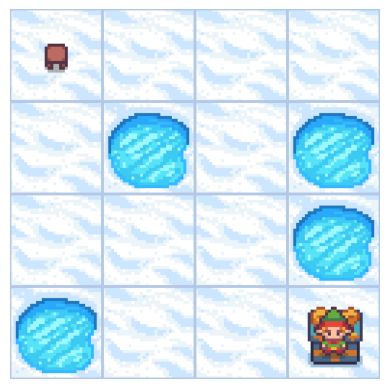

(1.0, 18)

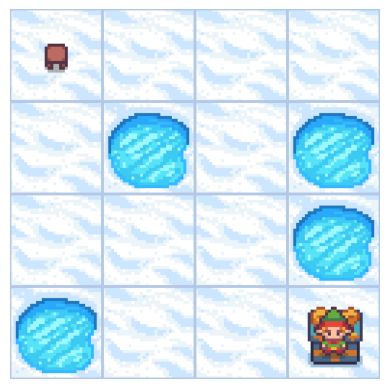

In [ ]:
play(env, q_table, render=True)

In [ ]:
window = 100
average_y = []
for ind in range(len(rewards_all) - window + 1):
    average_y.append(np.mean(rewards_all[ind:ind+window]))

In [ ]:
for ind in range(window - 1):
    average_y.insert(0, np.nan)

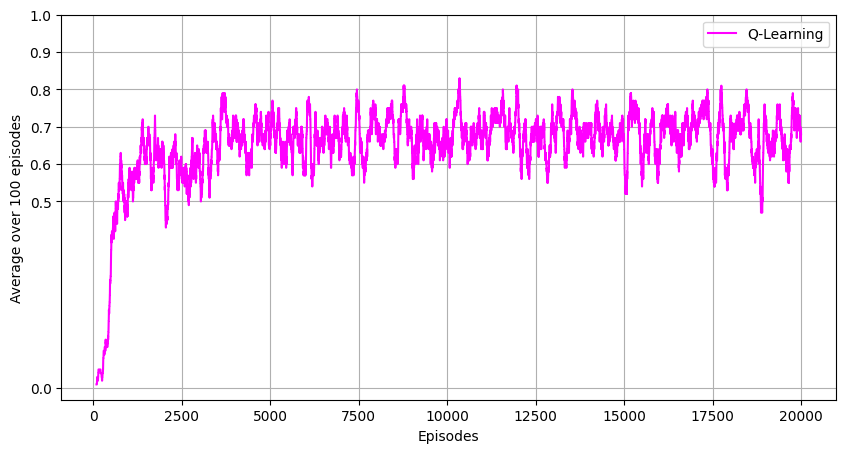

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(rewards_all)), average_y, color='magenta', label='Q-Learning')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.show()

# **SARSA**

In [ ]:
def sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []
    for episode in range(num_episodes):
        state, _ = env.reset()
        reward_episode = 0.0
        done = False
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate*episode)

        exploration = random.uniform(0,1)
        if exploration < epsilon:
          action = env.action_space.sample()
        else:
          action = np.argmax(q_table[state, :])

        for step in range(num_steps_per_episode):
            next_state, reward, terminated, truncated, _ = env.step(action)

            exploration = random.uniform(0,1)
            if exploration < epsilon:
                next_action = env.action_space.sample()
            else:
                next_action = np.argmax(q_table[next_state, :])

            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * q_table[next_state,next_action])

            reward_episode += reward
            state = next_state
            action = next_action

            if terminated or truncated:
                done = True

            if done:
                break

        rewards_all.append(reward_episode)
    print(f'Episode {episode} finished')
    return q_table, rewards_all

# **FrozenLake-v1**

In [ ]:
# Hyperparameters
gamma = 0.99
learning_rate = 0.1
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.005
num_episodes = 20000
num_steps_per_episode = 100

env = gym.make('FrozenLake-v1', render_mode="rgb_array")

In [ ]:
print('FrozenLake-v1')
#Q-Learning
print("Q-Learning:")
q_time_start= time.time()
q_table, q_rewards = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)
q_time_end= time.time()
play_multiple_times(env, q_table, 1000)
print(f"Time: {round(q_time_end-q_time_start,7)}")

print("----------------------------------------------------------")

#SARSA
print("SARSA: ")
s_time_start= time.time()
s_table, s_rewards = sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)
s_time_end= time.time()
play_multiple_times(env, s_table, 1000)
print(f"Time: {round(s_time_end-s_time_start,7)}\n")

FrozenLake-v1
Q-Learning:
Episode 19999 finished
Number of successes: 731/1000
Average number of steps: 37.82216142270862
Time: 23.6826127
----------------------------------------------------------
SARSA: 
Episode 19999 finished
Number of successes: 735/1000
Average number of steps: 36.08163265306123
Time: 14.1457973



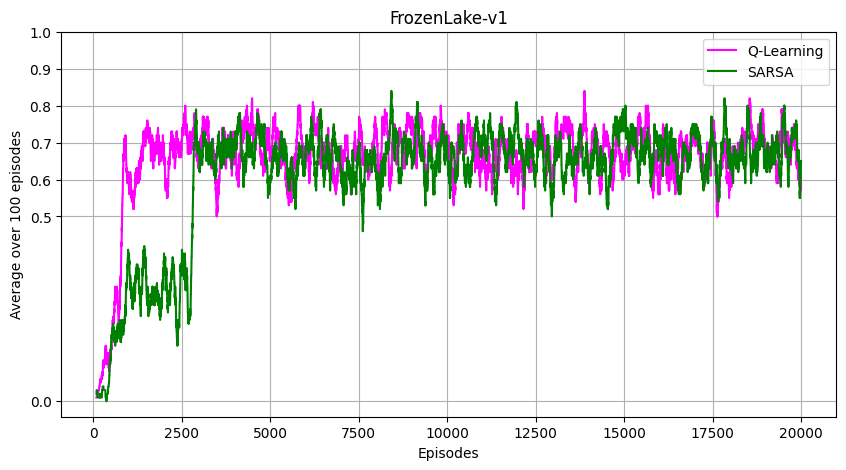

In [ ]:
window = 100
q_average_y = []
s_average_y = []

for ind in range(len(q_rewards) - window + 1):
    q_average_y.append(np.mean(q_rewards[ind:ind+window]))
for ind in range(len(s_rewards) - window + 1):
    s_average_y.append(np.mean(s_rewards[ind:ind+window]))

for ind in range(window - 1):
    q_average_y.insert(0, np.nan)
    s_average_y.insert(0, np.nan)

plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(q_rewards)), q_average_y, color='magenta', label='Q-Learning')
plt.plot(np.arange(len(s_rewards)), s_average_y, color='green', label='SARSA')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.title('FrozenLake-v1')
plt.legend()
plt.show()

#### **Nhận xét**
- Thời gian chạy của SARSA (14.1457973s) nhanh hơn nhiều so với Q-Learning (23.6826127s).
- Tuy nhiên, dựa vào biểu đồ có thể thấy Q-Learning cần ít episodes hơn để hội tụ so với SARSA. Sau khi cả 2 đều hội tụ thì cho kết quả tương tự nhau.
- Khi test với 1000 episodes thì số lần thành công và số bước trung bình của cả 2 thuật toán chênh lệch không đáng kể, SARA có nhỉnh hơn một chút.

# **FrozenLake8x8-v1**

In [ ]:
# Hyperparameters
gamma = 0.99
learning_rate = 0.7
max_epsilon = 1.0
min_epsilon = 0.001
epsilon_decay_rate = 0.00005
num_episodes = 300000
num_steps_per_episode = 500
env = gym.make('FrozenLake8x8-v1', render_mode="rgb_array")

In [ ]:
print('FrozenLake8x8-v1')
#Q-Learning
print("Q-Learning:")
q_time_start= time.time()
q_table, q_rewards = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)
q_time_end= time.time()
play_multiple_times(env, q_table, 1000)
print(f"Time: {round(q_time_end-q_time_start,7)}")

print("----------------------------------------------------------")

#SARSA
print("SARSA: ")
s_time_start= time.time()
s_table, s_rewards = sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)
s_time_end= time.time()
play_multiple_times(env, s_table, 1000)
print(f"Time: {round(s_time_end-s_time_start,7)}\n")

FrozenLake8x8-v1
Q-Learning:
Episode 299999 finished
Number of successes: 849/1000
Average number of steps: 101.98939929328623
Time: 1038.4132953
----------------------------------------------------------
SARSA: 
Episode 299999 finished
Number of successes: 693/1000
Average number of steps: 105.4920634920635
Time: 639.8922582



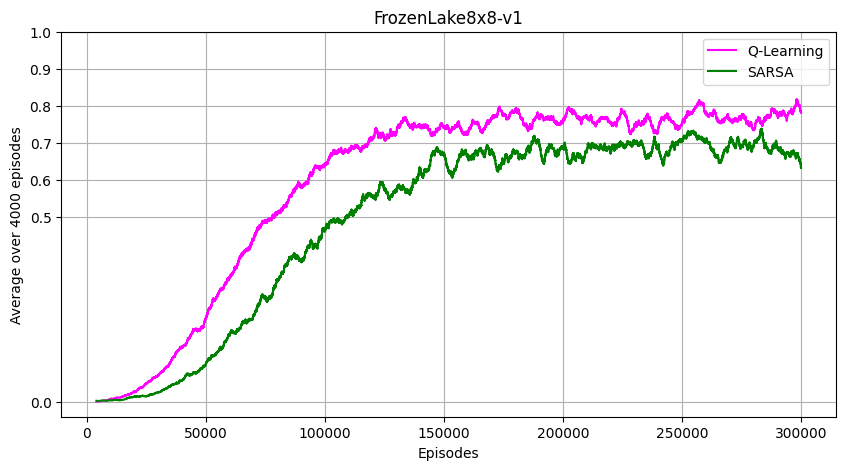

In [ ]:
window = 4000
q_average_y = []
s_average_y = []

for ind in range(len(q_rewards) - window + 1):
    q_average_y.append(np.mean(q_rewards[ind:ind+window]))
for ind in range(len(s_rewards) - window + 1):
    s_average_y.append(np.mean(s_rewards[ind:ind+window]))

for ind in range(window - 1):
    q_average_y.insert(0, np.nan)
    s_average_y.insert(0, np.nan)

plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(q_rewards)), q_average_y, color='magenta', label='Q-Learning')
plt.plot(np.arange(len(s_rewards)), s_average_y, color='green', label='SARSA')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.title('FrozenLake8x8-v1')
plt.legend()
plt.show()


#### **Nhận xét**
- FrozenLake8x8-v1 là một môi trường phức tạp hơn rất nhiều so với FrozenLake-v1, nên để huấn luyện tác nhân trong môi trường này ta cần nhiều episodes, do đó thời gian chạy khá lâu.
- Thời gian chạy của SARSA (639.8922582s) là vượt trội so với Q-Learning (1038.4132953s).
- Tuy nhiên, dựa vào biểu đồ có thể thấy Q-Learning cần ít episodes hơn để hội tụ. Sau khi cả 2 đều hội tụ thì SARSA cho kết quả không tốt bằng Q-Learning.
- Khi test với 1000 episodes thì số lần thành công của Q-Learning (849/1000) lớn hơn nhiều so với SARSA (693/1000), còn số bước trung bình của cả 2 thuật toán gần ngang nhau.

# **Taxi-v3**

In [ ]:
# Hyperparameters
gamma = 0.99
learning_rate = 0.1
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.005
num_episodes = 5000
num_steps_per_episode = 100
env = gym.make('Taxi-v3', render_mode="rgb_array")

In [ ]:
print('Taxi-v3')
#Q-Learning
print("Q-Learning:")
q_time_start= time.time()
q_table, q_rewards = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)
q_time_end= time.time()
play_multiple_times(env, q_table, 1000)
print(f"Time: {round(q_time_end-q_time_start,7)}")

print("----------------------------------------------------------")

#SARSA
print("SARSA: ")
s_time_start= time.time()
s_table, s_rewards = sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)
s_time_end= time.time()
play_multiple_times(env, s_table, 1000)
print(f"Time: {round(s_time_end-s_time_start,7)}\n")

Taxi-v3
Q-Learning:
Episode 4999 finished
Number of successes: 1000/1000
Average number of steps: 12.958
Time: 5.7525189
----------------------------------------------------------
SARSA: 
Episode 4999 finished
Number of successes: 1000/1000
Average number of steps: 13.032
Time: 3.793643



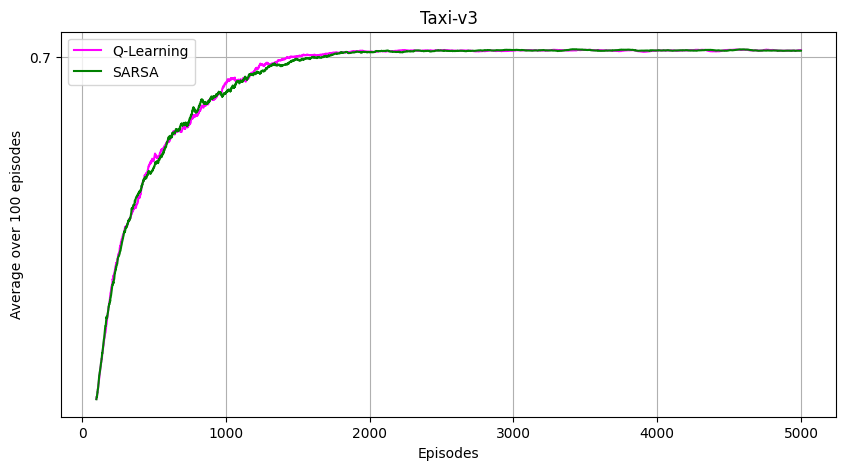

In [ ]:
window = 100
q_average_y = []
s_average_y = []

for ind in range(len(q_rewards) - window + 1):
    q_average_y.append(np.mean(q_rewards[ind:ind+window]))
for ind in range(len(s_rewards) - window + 1):
    s_average_y.append(np.mean(s_rewards[ind:ind+window]))

for ind in range(window - 1):
    q_average_y.insert(0, np.nan)
    s_average_y.insert(0, np.nan)

plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(q_rewards)), q_average_y, color='magenta', label='Q-Learning')
plt.plot(np.arange(len(s_rewards)), s_average_y, color='green', label='SARSA')
plt.yticks([ 0.7])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.title('Taxi-v3')
plt.legend()
plt.show()

#### **Nhận xét**
- Thời gian chạy của SARSA (3.793643s) nhanh hơn một chút so với Q-Learning (5.7525189s).
- Môi trường Taxi-v3 khá đơn giản nên cả hai thuật toán đều cần ít episodes để huấn luyện và kết quả trong quá trình huấn luyện của chúng không mấy khác biệt.
- Khi test với 1000 episodes, Q-Leraning và SARSA đều cho số lần thành công 1000/1000 và số bước trung bình ngang nhau.

# **Tổng kết**

<html>
<body>
<h2><b>Bảng thống kê</b></h2>
<table>
<tr>
<th rowspan = 2>Environment</th>
<th colspan = 3>Q-Learning</th>
<th colspan = 3>SARSA</th>
</tr>
<tr>
<th scope = "col">Run time (s)</th>
<th scope = "col">Number of successes</th>
<th scope = "col">Average number of steps</th>
<th scope = "col">Run time (s)</th>
<th scope = "col">Number of successes</th>
<th scope = "col">Average number of steps</th>
</tr>
<tr>
<th scope = "row">FrozenLake-v1</th>
<td align="center">23.6826127</td>
<td align="center">731/1000</td>
<td align="center">37.82216142270862</td>
<td align="center">14.1457973</td>
<td align="center">735/1000</td>
<td align="center">36.08163265306123</td>
</tr>
<tr>
<th scope = "row">FrozenLake8x8-v1</th>
<td align="center">1038.4132953</td>
<td align="center">849/1000</td>
<td align="center">101.98939929328623</td>
<td align="center">639.8922582</td>
<td align="center">693/1000</td>
<td align="center">105.4920634920635</td>
</tr>
<tr>
<th scope = "row">Taxi-v3</th>
<td align="center">5.7525189</td>
<td align="center">1000/1000</td>
<td align="center">12.958</td>
<td align="center">3.793643</td>
<td align="center">1000/1000</td>
<td align="center">13.032</td>
</tr>
</table>
<h2><b>Nhận xét chung </b></h2>
</body>
</html>

- Ở cả 3 môi trường thời gian chạy SARSA đều nhanh hơn Q-Learning, một phần là do trong công thức cập nhật Q(s,a) của SARSA dùng Q(s',a') thay vì maxQ(s',a) như trong Q-Learning nên không tốn thời gian phải đi tìm max này.

- Q-Learning thường hội tụ nhanh hơn SARSA vì Q-Learning trực tiếp ước lượng giá trị của chính sách tối ưu 𝜋* (trong khi thực hiện chính sách khác - 𝜋b) , còn SARSA ước lượng chính sách hành vi hiện tại - 𝜋b,  sau đó cập nhật chính sách này.

- Hiệu suất Q-Learning và SARSA tùy thuộc nhiều vào môi trường.


